In [1]:
# Add local scripts to module search path
import sys
import os
sys.path.append(os.path.realpath('../toliman-proper'))

# Explore PSF for single lens system

Avoids problems introduced by struts or secondary mirror.

In [2]:
from proper_tools import form_detector_image
from spirals import binarized_ringed_flipped

prescription = 'prescription_quad'
# The actual values probably don't matter all that much for the purposes of this comparison.

beam_ratio = 0.4
gridsize = 2048
def binarized_ringed_650(r, phi):
    opd = 650.*1e-9*0.5
    return binarized_ringed_flipped(r, phi, opd)

toliman_settings = {
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 571.7300 / 1000.,
                    'm1_m2_sep': 549.240/1000.,
                    'm2_fl': -23.3800/1000.,
                    'bfl': 590.000 / 1000., 
                    'm2_rad': 5.9 / 1000., 
                    'm2_strut_width': 0.01,
                    'm2_supports': 5,
                    'beam_ratio': beam_ratio,
                    'tilt_x': 0.00,
                    'tilt_y': 0.00,
                    'phase_func': binarized_ringed_650,
                    'm1_hole_rad':0.025
                    }

detector_pitch = 11.0e-6 # m/pixel on detector
npixels = 512 # Size of detector, in pixels

wl_gauss = [5.999989e-01,
            6.026560e-01,
            6.068356e-01,
            6.119202e-01,
            6.173624e-01,
            6.226281e-01,
            6.270944e-01,
            6.300010e-01 ]
weights_gaus = [5.3770e-02,
                1.1224e-01,
                1.5056e-01,
                1.7034e-01,
                1.7342e-01,
                1.5861e-01,
                1.2166e-01,
                5.9360e-02 ]

/home/ubuntu/miniconda/envs/astroconda/lib/python3.5/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [3]:
# First source, on axis
source_a = {
            'wavelengths': [0.6],#wl_gauss[:4],
            'weights': [1.],#weights_gaus[:4],
            'settings': toliman_settings
            }

In [4]:
viewport = 1. # mm

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def view_psf(imarray, pitch_mm, viewport_mm):
    c = imarray.shape[0]/2. # Assume scaled image
    w = viewport_mm/pitch_mm
    plt.imshow(np.log10(imarray[int(c-w):int(c+w),int(c-w):int(c+w)]),cmap='viridis', extent=[x*pitch_mm for x in [-w,w,-w,w]],vmin=-10, vmax=-5)
    plt.colorbar()
    plt.show()

## Consider simpler single lens system

In [6]:
%matplotlib inline
import proper
quad_settings = {
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 15.,
                    'beam_ratio': beam_ratio,
                    'tilt_x': 0.00,
                    'tilt_y': 0.00,
                    'phase_func': binarized_ringed_650
                    }
(quad_wf, quad_sampling) = proper.prop_run(prescription, 0.6, gridsize = gridsize, QUIET=True, PRINT_INTENSITY=False, PASSVALUE=quad_settings)

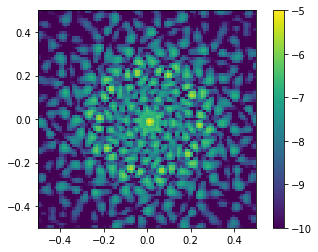

In [7]:
view_psf(np.abs(quad_wf)**2, quad_sampling/1e-3, .5)

## Investigate whether spiral is being clipped or swamped

In [ ]:
from gen_opdmap import gen_opdmap
#phasemap_file = 'binarized_ringed_650_2048_0.00036621093749999995.npy'
phasemap = gen_opdmap(binarized_ringed_650, 2048, 0.00036621093749999995, use_cached=False, save_cached=False)

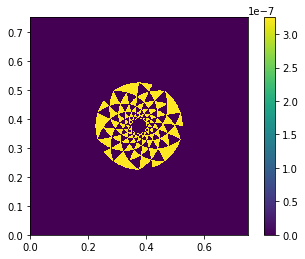

In [9]:
plt.imshow(phasemap,cmap='viridis',extent=[x*0.00036621093749999995 for x in [0,2048,0,2048]])
plt.colorbar()
plt.show()

600.0


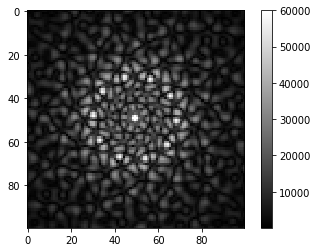

605.0


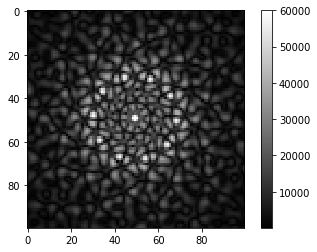

610.0


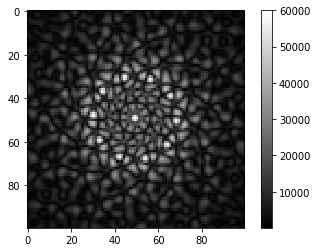

615.0


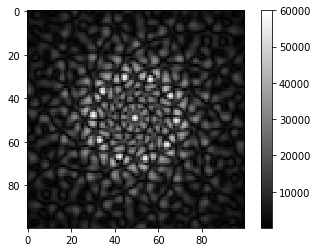

620.0


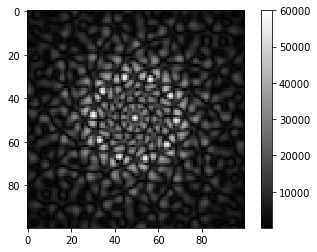

625.0


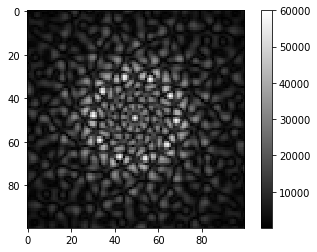

630.0


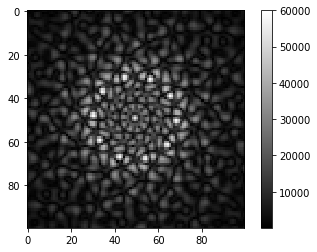

635.0


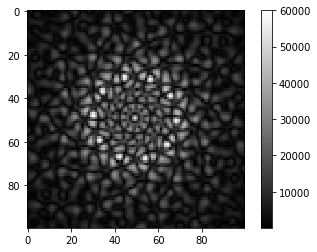

640.0


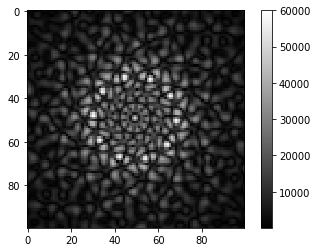

645.0


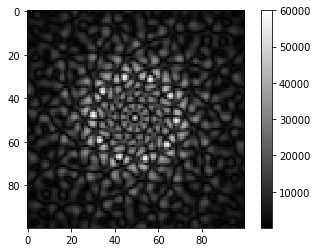

650.0


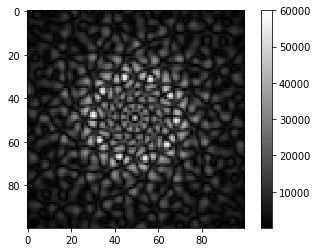

In [11]:
import numpy as np
import math
import matplotlib.colors as mcolors

for wl in [600.+5.*d for d in range(11)]:
    print(wl)
    wf = np.exp((2*np.pi*complex(0., 1.)/(wl*1e-9))*phasemap)

    ngrid = 2048
    c = ngrid/2.
    sampling = 0.00036621093749999995
    scale = 0.15/300.
    for i in range(ngrid):
        for j in range(ngrid):
            x = i - c
            y = j - c
            r = sampling*math.hypot(x,y)/scale
            if(r>300 or r<50):
                wf[i][j] *= 0
    plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(wf))[975:1075,975:1075]),vmax=60000, cmap=plt.get_cmap('gray'))
    plt.colorbar()
    plt.show()

In [12]:
z = np.abs(np.fft.fftshift(np.fft.fft2(wf))[975:1075,975:1075])

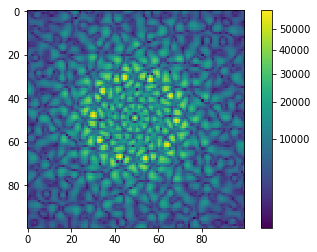

In [18]:
import matplotlib.colors as mcolors

plt.imshow(z,norm=mcolors.PowerNorm(0.5))
plt.colorbar()
plt.show()

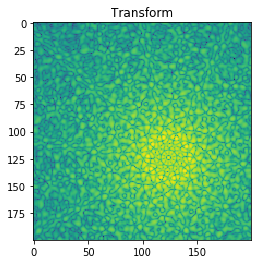

In [15]:
plt.title('Transform')
plt.imshow(np.log10(np.abs(np.fft.fftshift(np.fft.fft2(wf))[900:1100,900:1100])))
plt.show()

What about hole?
What about limits of lens 

The spiral function generates a pattern between 50 and 300 units, with each unit being scale = 0.15/300. So physical radii are 150mm outer and 25mm inner.



100


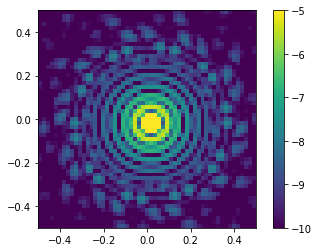

150


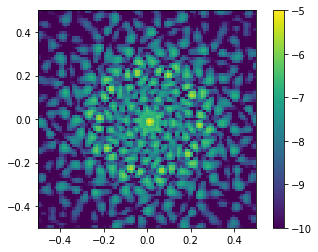

175


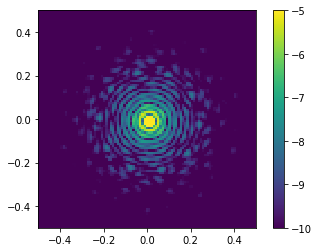

200


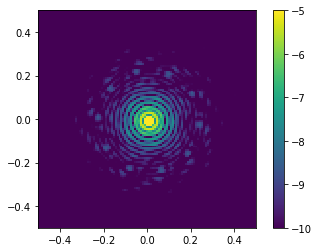

250


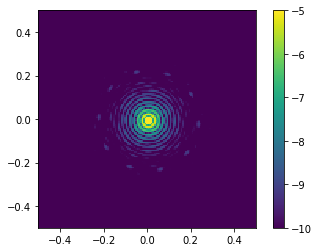

In [16]:
%matplotlib inline
import proper
for r in [100, 150, 175, 200, 250]:
    print(r)
    quad_settings = {
                    'diam': 0.001 * 2. * r, 
                    'm1_fl': 15.,
                    'beam_ratio': beam_ratio,
                    'tilt_x': 0.00,
                    'tilt_y': 0.00,
                    'phase_func': binarized_ringed_650
                    }
    (quad_wf, quad_sampling) = proper.prop_run(prescription, 0.6, gridsize = gridsize, QUIET=True, PRINT_INTENSITY=False, PASSVALUE=quad_settings)
    view_psf(np.abs(quad_wf)**2, quad_sampling/1e-3, .5)

## Effect of internal hole

Vary the size of the hole in the mirror/lens to see effect upon PSF.

None


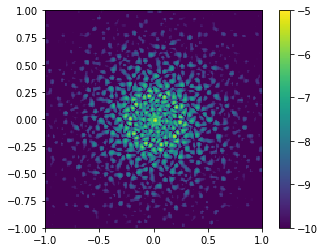

0.01


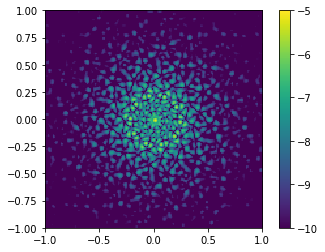

0.02


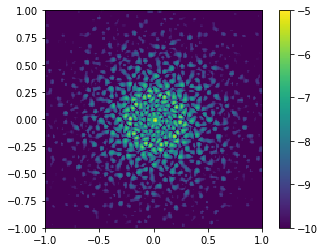

0.03


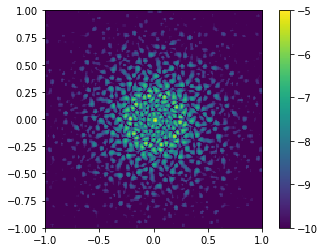

0.04


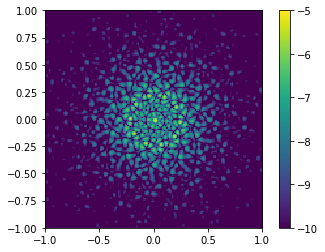

0.05


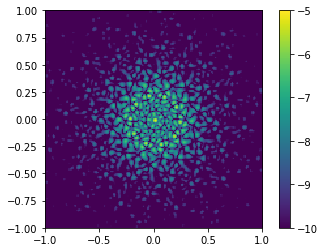

0.075


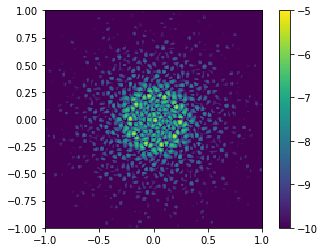

0.1


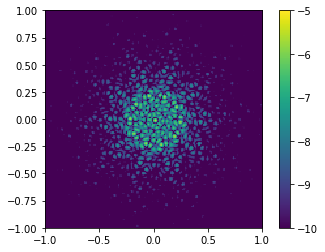

In [17]:
%matplotlib inline
import proper
for r in [None, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1]:
    print(r)
    quad_settings = {
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 15.,
                    'beam_ratio': beam_ratio,
                    'tilt_x': 0.00,
                    'tilt_y': 0.00,
                    'phase_func': binarized_ringed_650,
                    'm1_hole_rad': r
                    }
    (quad_wf, quad_sampling) = proper.prop_run(prescription, 0.6, gridsize = gridsize, QUIET=True, PRINT_INTENSITY=False, PASSVALUE=quad_settings)
    view_psf(np.abs(quad_wf)**2, quad_sampling/1e-3, 1)